In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import chardet

from sklearn.preprocessing import LabelEncoder
from nltk.stem.porter import PorterStemmer

import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split


In [107]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/colemak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [108]:
from nltk.tokenize import word_tokenize

In [109]:
with open('/Users/colemak/Documents/Spamdetector/spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
result

{'encoding': 'Windows-1252', 'confidence': 0.7269493857068697, 'language': ''}

In [110]:
df = pd.read_csv('/Users/colemak/Documents/Spamdetector/spam.csv', encoding='Windows-1252')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [112]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [113]:
df.shape

(5572, 2)

In [200]:
df.head()

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [115]:
encoder =LabelEncoder()
df['message_type']=encoder.fit_transform(df['message_type'])

In [116]:
df.head()

,message_type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [117]:
df[df['message_type']==1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [118]:
df.isnull().sum()

message_type    0
message         0
dtype: int64

In [119]:
df.duplicated().sum()

np.int64(403)

In [120]:
df = df.drop_duplicates()
df

,message_type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [121]:
df['message_type'].value_counts()

message_type
0    4516
1     653
Name: count, dtype: int64

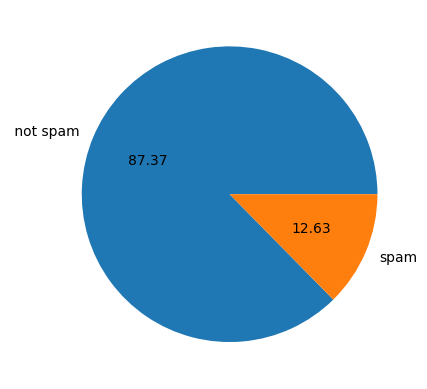

In [122]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

In [123]:
df['num_characters']=df['message'].apply(len)
df.head()

/var/folders/nn/gf8lxlln19x11p86kx7t1z4r0000gn/T/ipykernel_5946/2138444057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['message'].apply(len)


,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [124]:
df.shape

(5169, 3)

In [125]:
df['message'].apply(lambda x: nltk.word_tokenize(x))
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

/var/folders/nn/gf8lxlln19x11p86kx7t1z4r0000gn/T/ipykernel_5946/2700319326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))


,message_type,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [126]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

/var/folders/nn/gf8lxlln19x11p86kx7t1z4r0000gn/T/ipykernel_5946/2365132942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


,message_type,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [127]:
#Non-Spam Messages
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [128]:
#Spam Messages
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [129]:
df.to_csv('data.csv')

<Axes: xlabel='num_characters', ylabel='Count'>

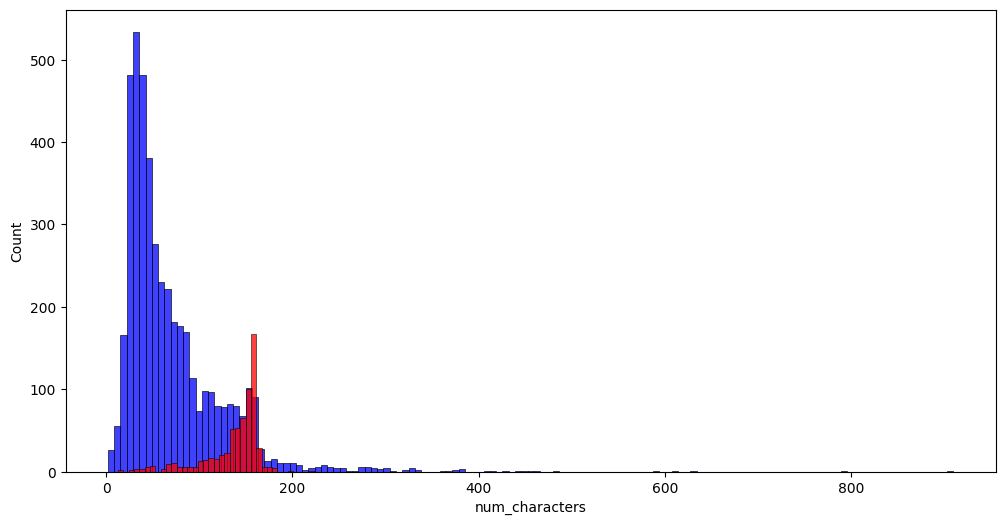

In [130]:
#visualizing characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='blue')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

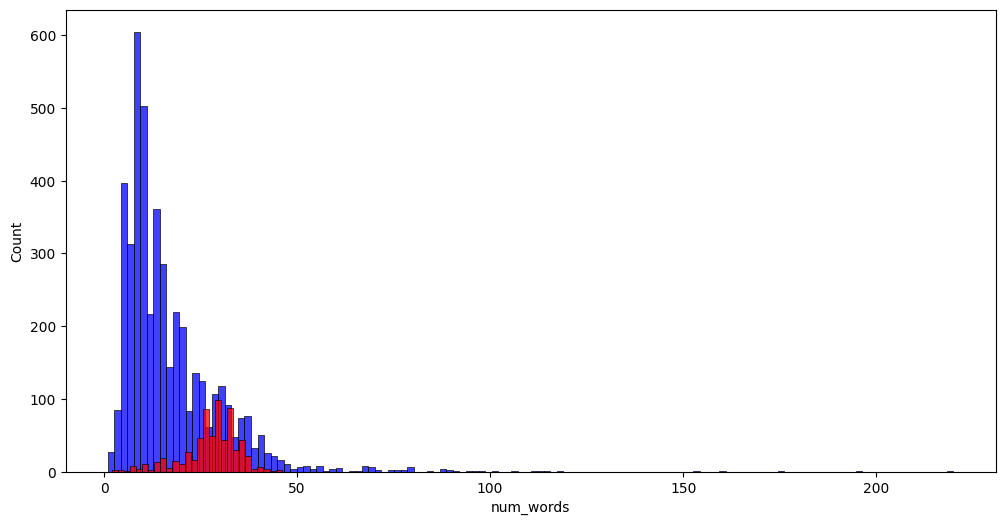

In [131]:
#visualizing words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='blue')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

<Axes: >

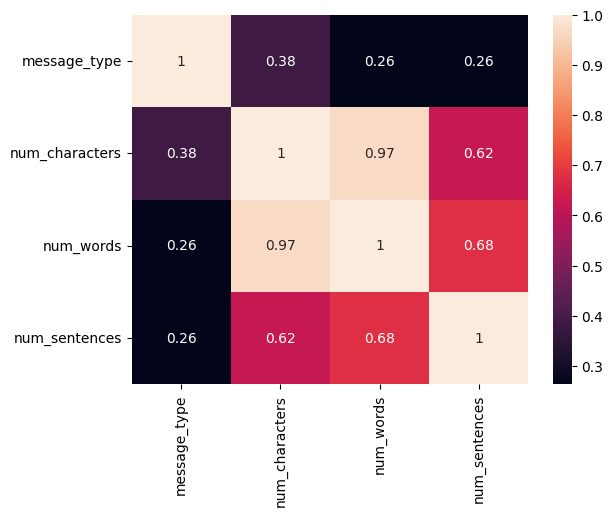

In [132]:
#plotting a heatmap for the correlation
df_heatmap = df[['message_type','num_characters', 'num_words','num_sentences']]
sns.heatmap(df_heatmap.corr(),annot=True)

In [133]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/colemak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [134]:
ps =PorterStemmer()

In [135]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)
    y=[] 
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()
    
    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    #now stemming function
    for i in message:
        y.append(ps.stem(i))
    
    #return y  --> returns as list
    return " ".join(y)

In [136]:
df['transformed_msg']=df['message'].apply(text_transform)

/var/folders/nn/gf8lxlln19x11p86kx7t1z4r0000gn/T/ipykernel_5946/2834270334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_msg']=df['message'].apply(text_transform)


In [137]:
df

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u. u å£750 pound prize ...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,ì_ b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood ... suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like 'd interest buy someth els ...


In [138]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

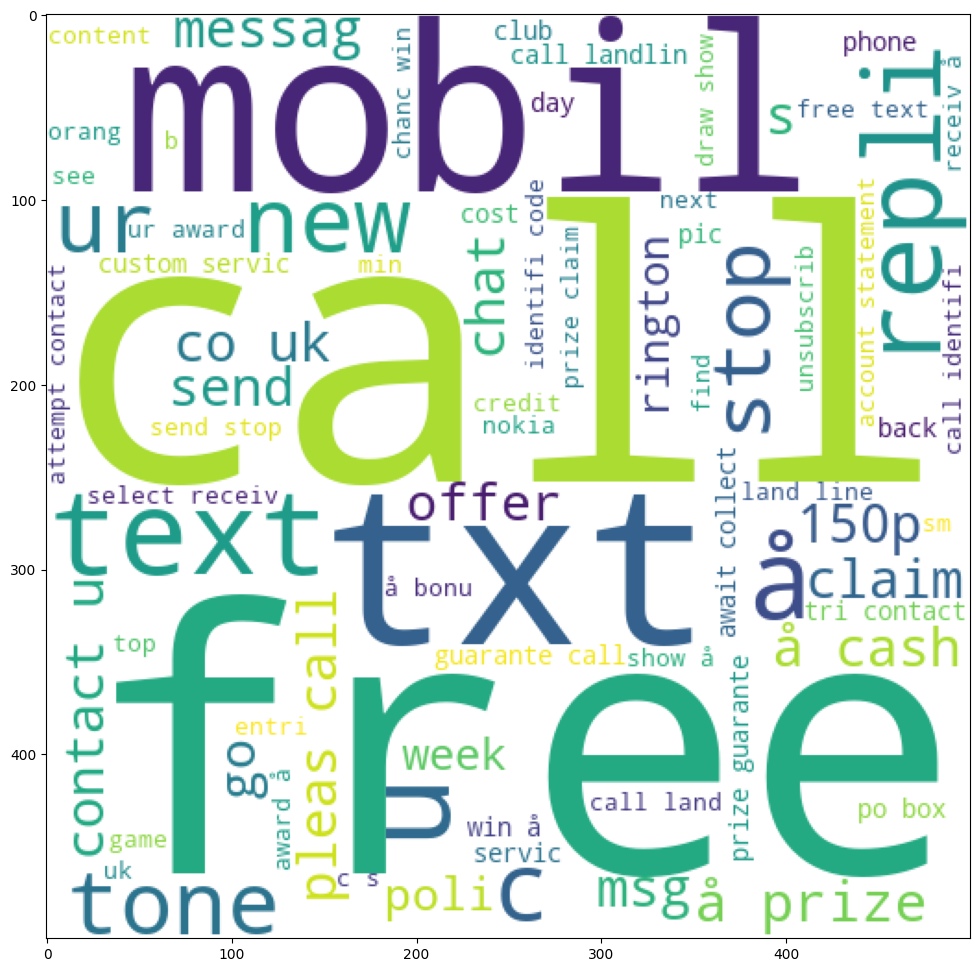

In [139]:
spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

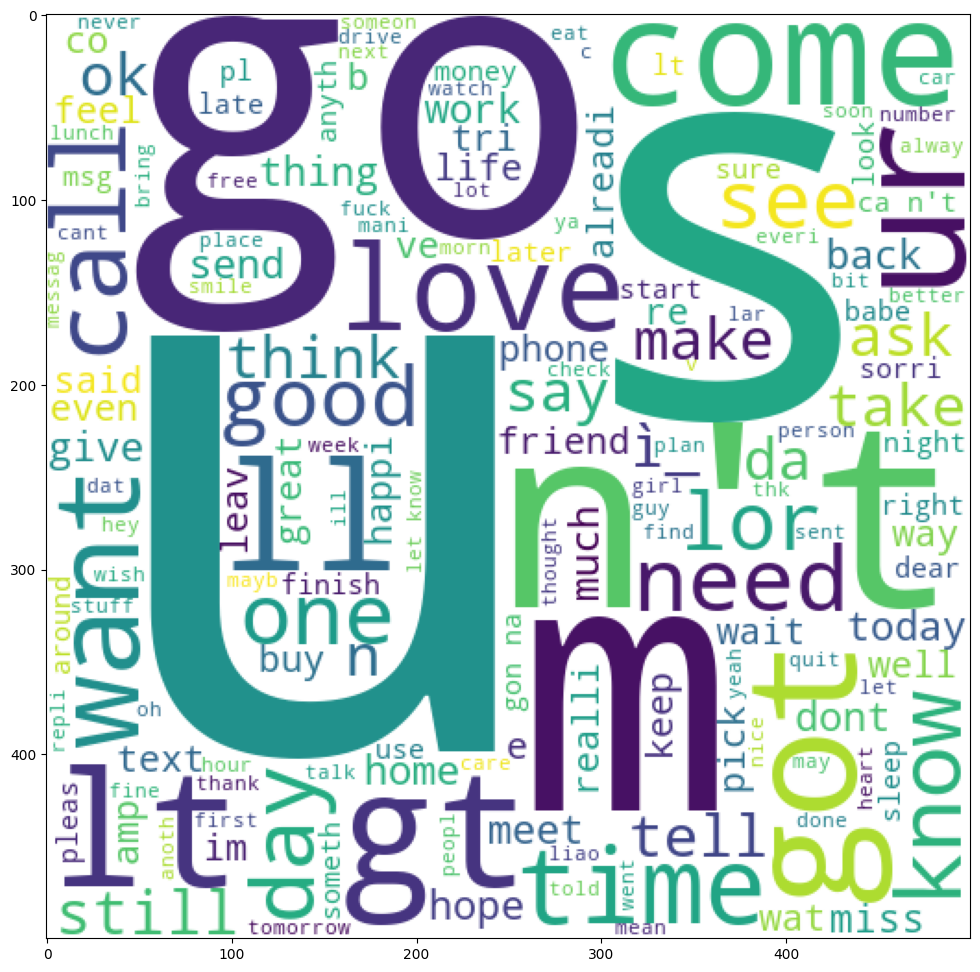

In [140]:
ham_wc = wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

/var/folders/nn/gf8lxlln19x11p86kx7t1z4r0000gn/T/ipykernel_5946/1228438028.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette="Spectral")


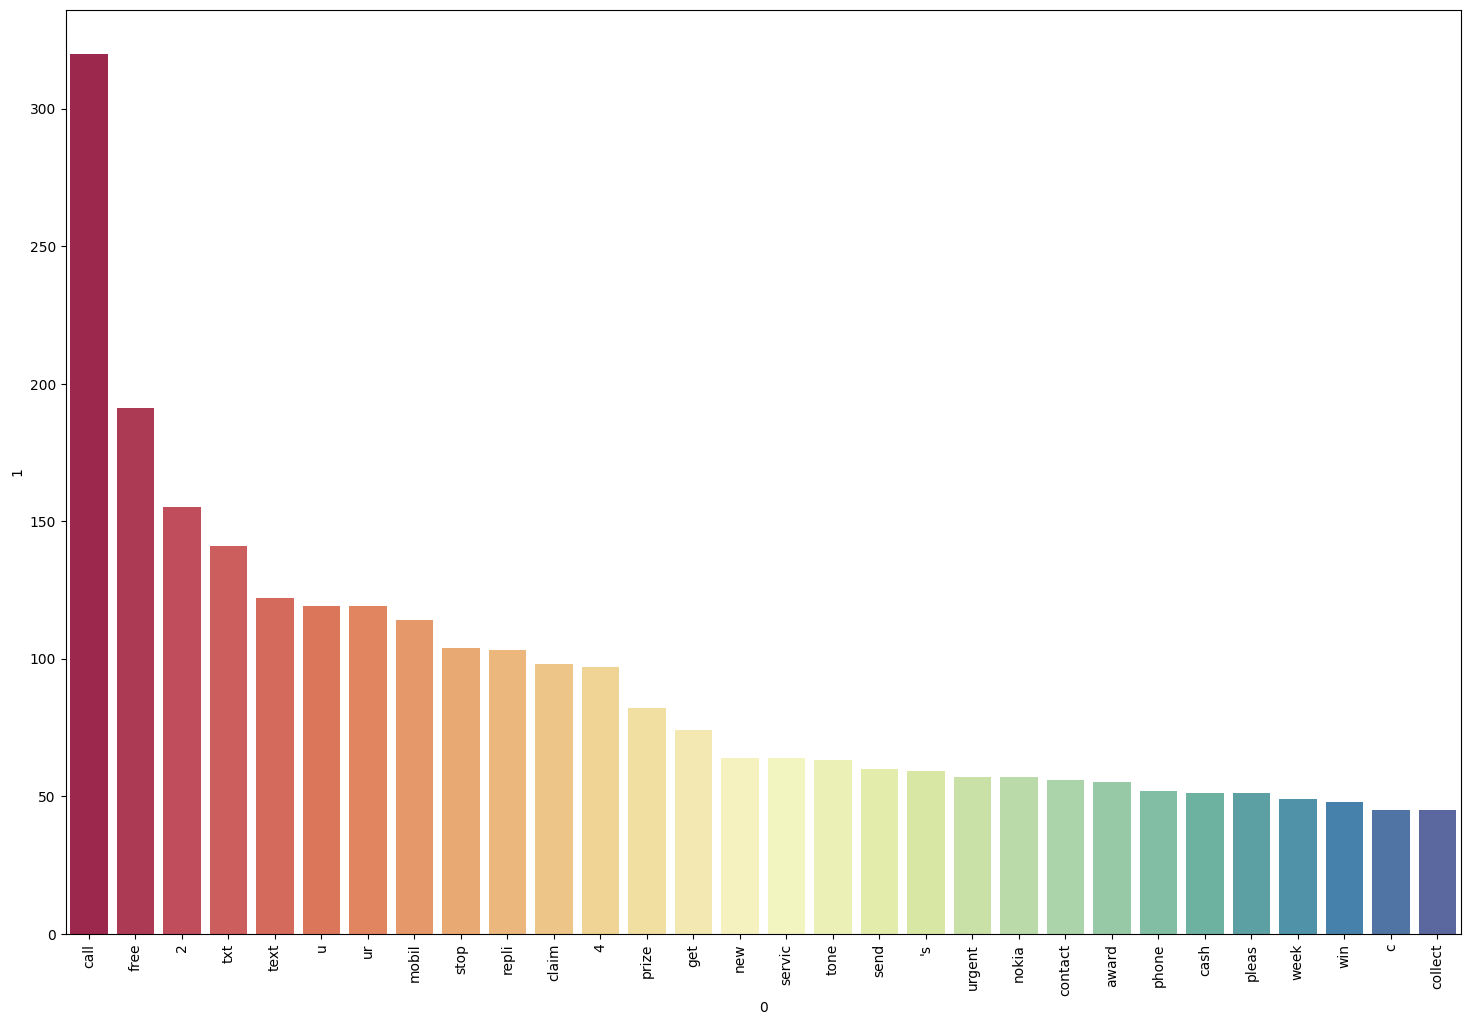

In [141]:
spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

from collections import Counter
Counter(spam_corpus)
Counter(spam_corpus).most_common(30)

plt.figure(figsize=(18,12))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette="Spectral")
plt.xticks(rotation='vertical')
plt.show()

/var/folders/nn/gf8lxlln19x11p86kx7t1z4r0000gn/T/ipykernel_5946/1418668500.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette="Spectral")


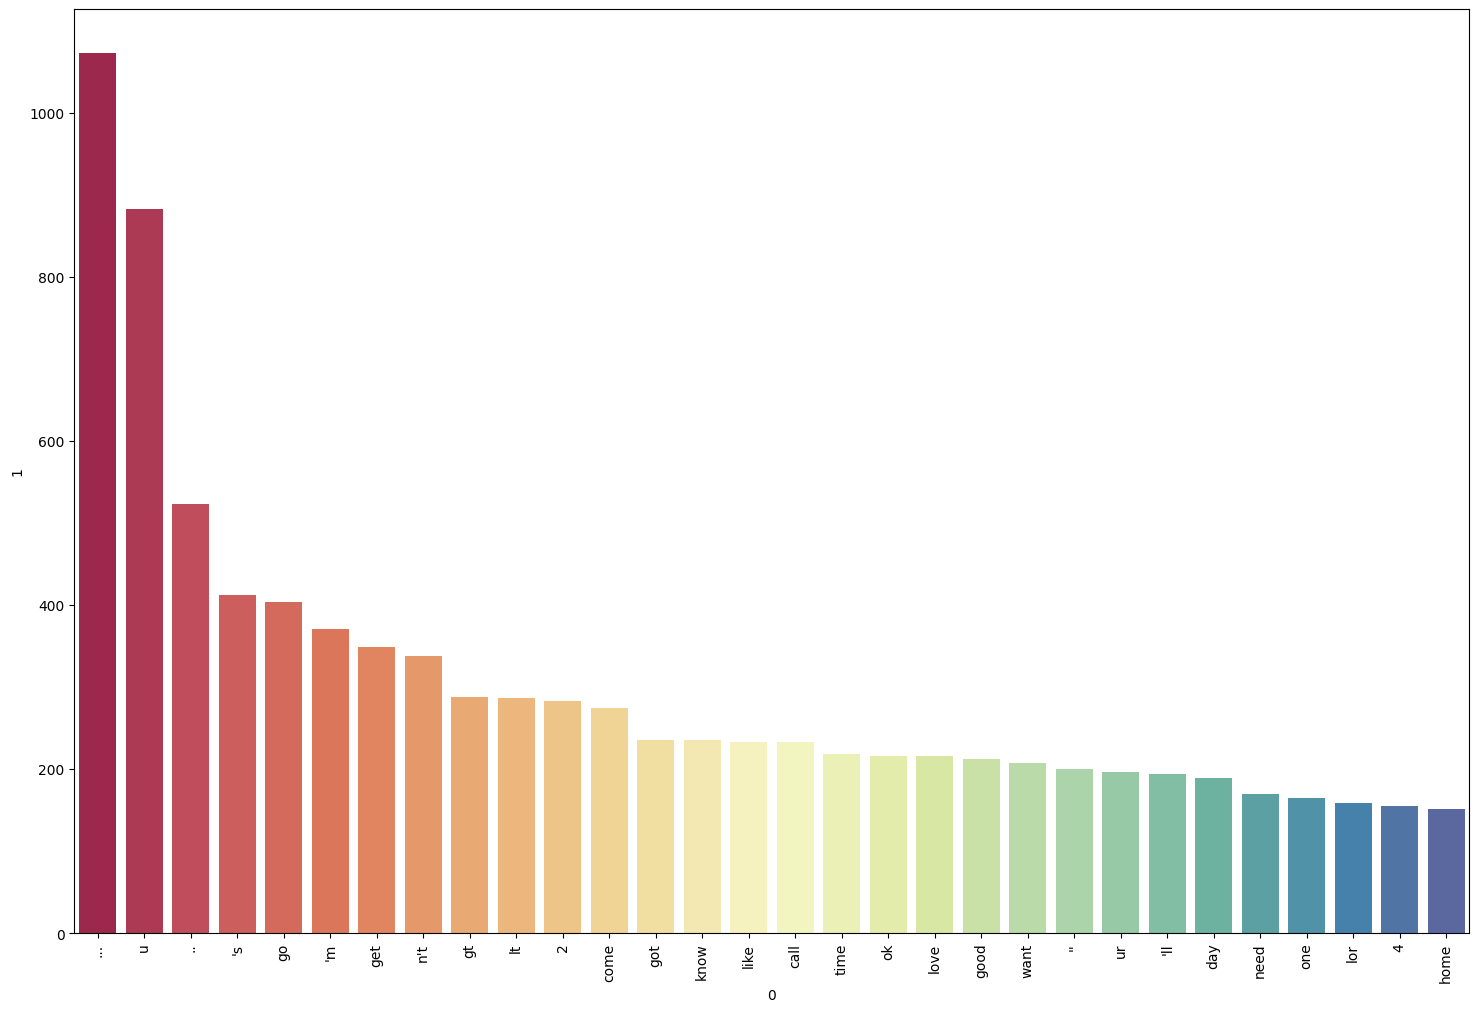

In [142]:
ham_corpus = []
for msg in df[df['message_type']==0]['transformed_msg'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

Counter(ham_corpus).most_common(30)

plt.figure(figsize=(18,12))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette="Spectral")
plt.xticks(rotation='vertical')
plt.show()

In [143]:

cv = CountVectorizer()
X=cv.fit_transform(df['transformed_msg']).toarray()
y=df['message_type'].values
X.shape

(5169, 7378)

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [145]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [146]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8887814313346228
Confusion Matrix of Guassian NB is:  [[786 102]
 [ 13 133]]
Precision score of the Gaussian NB is 0.5659574468085107


In [147]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9806576402321083
Confusion Matrix of Multinomial NB is:  [[876  12]
 [  8 138]]
Precision score of the Multinomial NB is 0.92


In [148]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.9709864603481625
Confusion Matrix of Bernoulli NB is:  [[883   5]
 [ 25 121]]
Precision score of the Bernoulli NB is 0.9603174603174603


In [174]:
tfidf= TfidfVectorizer(max_features=5000)

In [175]:
X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['message_type'].values
X.shape


(5169, 5000)

In [176]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=124)

In [177]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8752417794970987
Confusion Matrix of Guassian NB is:  [[799 108]
 [ 21 106]]
Precision score of the Gaussian NB is 0.4953271028037383


In [178]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9748549323017408
Confusion Matrix of Multinomial NB is:  [[906   1]
 [ 25 102]]
Precision score of the Multinomial NB is 0.9902912621359223


In [179]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.9777562862669246
Confusion Matrix of Bernoulli NB is:  [[906   1]
 [ 22 105]]
Precision score of the Bernoulli NB is 0.9905660377358491


In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [181]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [182]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [183]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [184]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9813084112149533
For  KN
Accuracy -  0.9100580270793037
Precision -  1.0
For  NB
Accuracy -  0.9748549323017408
Precision -  0.9902912621359223
For  DT
Accuracy -  0.9439071566731141
Precision -  0.8876404494382022
For  LR
Accuracy -  0.9632495164410058
Precision -  0.9405940594059405
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9722222222222222


/Users/colemak/Documents/Spamdetector/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9748549323017408
Precision -  0.9719626168224299
For  BgC
Accuracy -  0.965183752417795
Precision -  0.8888888888888888
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.972972972972973
For  GBDT
Accuracy -  0.9574468085106383
Precision -  0.9368421052631579


In [185]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.910058,1.000000
2,NB,0.974855,0.990291
0,SVC,0.976789,0.981308
8,ETC,0.978723,0.972973
5,RF,0.975822,0.972222
6,AdaBoost,0.974855,0.971963
4,LR,0.963250,0.940594
9,GBDT,0.957447,0.936842
7,BgC,0.965184,0.888889
3,DT,0.943907,0.887640


In [186]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.910058
1,NB,Accuracy,0.974855
2,SVC,Accuracy,0.976789
3,ETC,Accuracy,0.978723
4,RF,Accuracy,0.975822
5,AdaBoost,Accuracy,0.974855
6,LR,Accuracy,0.963250
7,GBDT,Accuracy,0.957447
8,BgC,Accuracy,0.965184
9,DT,Accuracy,0.943907


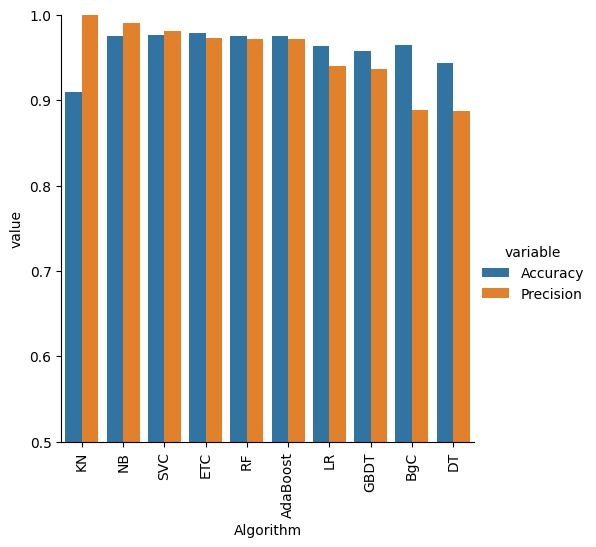

In [187]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [191]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_5000':accuracy_scores,'Precision_max_ft_5000':precision_scores}).sort_values('Precision_max_ft_5000',ascending=False)
temp_df

,Algorithm,Accuracy_max_ft_5000,Precision_max_ft_5000
1,KN,0.910058,1.000000
2,NB,0.974855,0.990291
0,SVC,0.976789,0.981308
8,ETC,0.978723,0.972973
5,RF,0.975822,0.972222
6,AdaBoost,0.974855,0.971963
4,LR,0.963250,0.940594
9,GBDT,0.957447,0.936842
7,BgC,0.965184,0.888889
3,DT,0.943907,0.887640


In [195]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_5000_x,Precision_max_ft_5000_x,Accuracy_max_ft_5000_y,Precision_max_ft_5000_y
0,KN,0.910058,1.000000,0.910058,1.000000,0.910058,1.000000
1,NB,0.974855,0.990291,0.974855,0.990291,0.974855,0.990291
2,SVC,0.976789,0.981308,0.976789,0.981308,0.976789,0.981308
3,ETC,0.978723,0.972973,0.978723,0.972973,0.978723,0.972973
4,RF,0.975822,0.972222,0.975822,0.972222,0.975822,0.972222
5,AdaBoost,0.974855,0.971963,0.974855,0.971963,0.974855,0.971963
6,LR,0.963250,0.940594,0.963250,0.940594,0.963250,0.940594
7,GBDT,0.957447,0.936842,0.957447,0.936842,0.957447,0.936842
8,BgC,0.965184,0.888889,0.965184,0.888889,0.965184,0.888889
9,DT,0.943907,0.887640,0.943907,0.887640,0.943907,0.887640


In [196]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))